In [4]:
# —— HSV空间目标检测 ——

import cv2
import numpy as np


def nothing(x):
    pass
# use track bar to perfectly define (1/2)
# the lower and upper values for HSV color space(2/2)
cap = cv2.VideoCapture(0)
cv2.namedWindow("Tracking")
#1 Lower/Upper HSV 3 startValue 4 endValue
cv2.createTrackbar("LH","Tracking",0,255,nothing)
cv2.createTrackbar("LS","Tracking",0,255,nothing)
cv2.createTrackbar("LV","Tracking",0,255,nothing)
cv2.createTrackbar("UH","Tracking",255,255,nothing)
cv2.createTrackbar("US","Tracking",255,255,nothing)
cv2.createTrackbar("UV","Tracking",255,255,nothing)


while True:
#     frame = cv2.imread('noodle.png')
    _,frame = cap.read()
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
#     l_b = np.array([110,50,50]) # lower blue value
#     u_b = np.array([130,255,255]) # upper blue
    l_h = cv2.getTrackbarPos("LH","Tracking")
    l_s = cv2.getTrackbarPos("LS","Tracking")
    l_v = cv2.getTrackbarPos("LV","Tracking")
    
    u_h = cv2.getTrackbarPos("UH","Tracking")
    u_s = cv2.getTrackbarPos("US","Tracking")
    u_v = cv2.getTrackbarPos("UV","Tracking")
    
    
    l_r = np.array([l_h, l_s, l_v]) # lower blue value
    u_r = np.array([u_h,u_s,u_v])
#     l_r = np.array([0, 43, 46]) # lower blue value
#     u_r = np.array([8,255,255]) # upper blue
    l_g = np.array([35, 43, 46]) # lower blue value
    u_g = np.array([77,255,255]) # upper blue

    mask = cv2.inRange(hsv,l_r,u_r)
    
    res=cv2.bitwise_and(frame,frame,mask=mask) # src1,src2
     
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)
    key = cv2.waitKey(1)
    if key == 27: # Esc
        break
cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import numpy as np


def nothing(x):
    pass
# use track bar to perfectly define (1/2)
# the lower and upper values for HSV color space(2/2)

cv2.namedWindow("Tracking")
#1 Lower/Upper HSV 3 startValue 4 endValue
cv2.createTrackbar("LH","Tracking",0,255,nothing)
cv2.createTrackbar("LS","Tracking",0,255,nothing)
cv2.createTrackbar("LV","Tracking",0,255,nothing)
cv2.createTrackbar("UH","Tracking",255,255,nothing)
cv2.createTrackbar("US","Tracking",255,255,nothing)
cv2.createTrackbar("UV","Tracking",255,255,nothing)


while True:
    frame = cv2.imread('color.jpg')
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
    
    l_h = cv2.getTrackbarPos("LH","Tracking")
    l_s = cv2.getTrackbarPos("LS","Tracking")
    l_v = cv2.getTrackbarPos("LV","Tracking")
    
    u_h = cv2.getTrackbarPos("UH","Tracking")
    u_s = cv2.getTrackbarPos("US","Tracking")
    u_v = cv2.getTrackbarPos("UV","Tracking")
    
    
    l_r = np.array([l_h, l_s, l_v]) # lower blue value
    u_r = np.array([u_h,u_s,u_v])

    mask = cv2.inRange(hsv,l_r,u_r)
    
    res=cv2.bitwise_and(frame,frame,mask=mask) # src1,src2
     
    cv2.imshow("frame", frame)
    cv2.imshow("mask", mask)
    cv2.imshow("res", res)
    key = cv2.waitKey(1)
    if key == 27: # Esc
        break
cv2.destroyAllWindows()

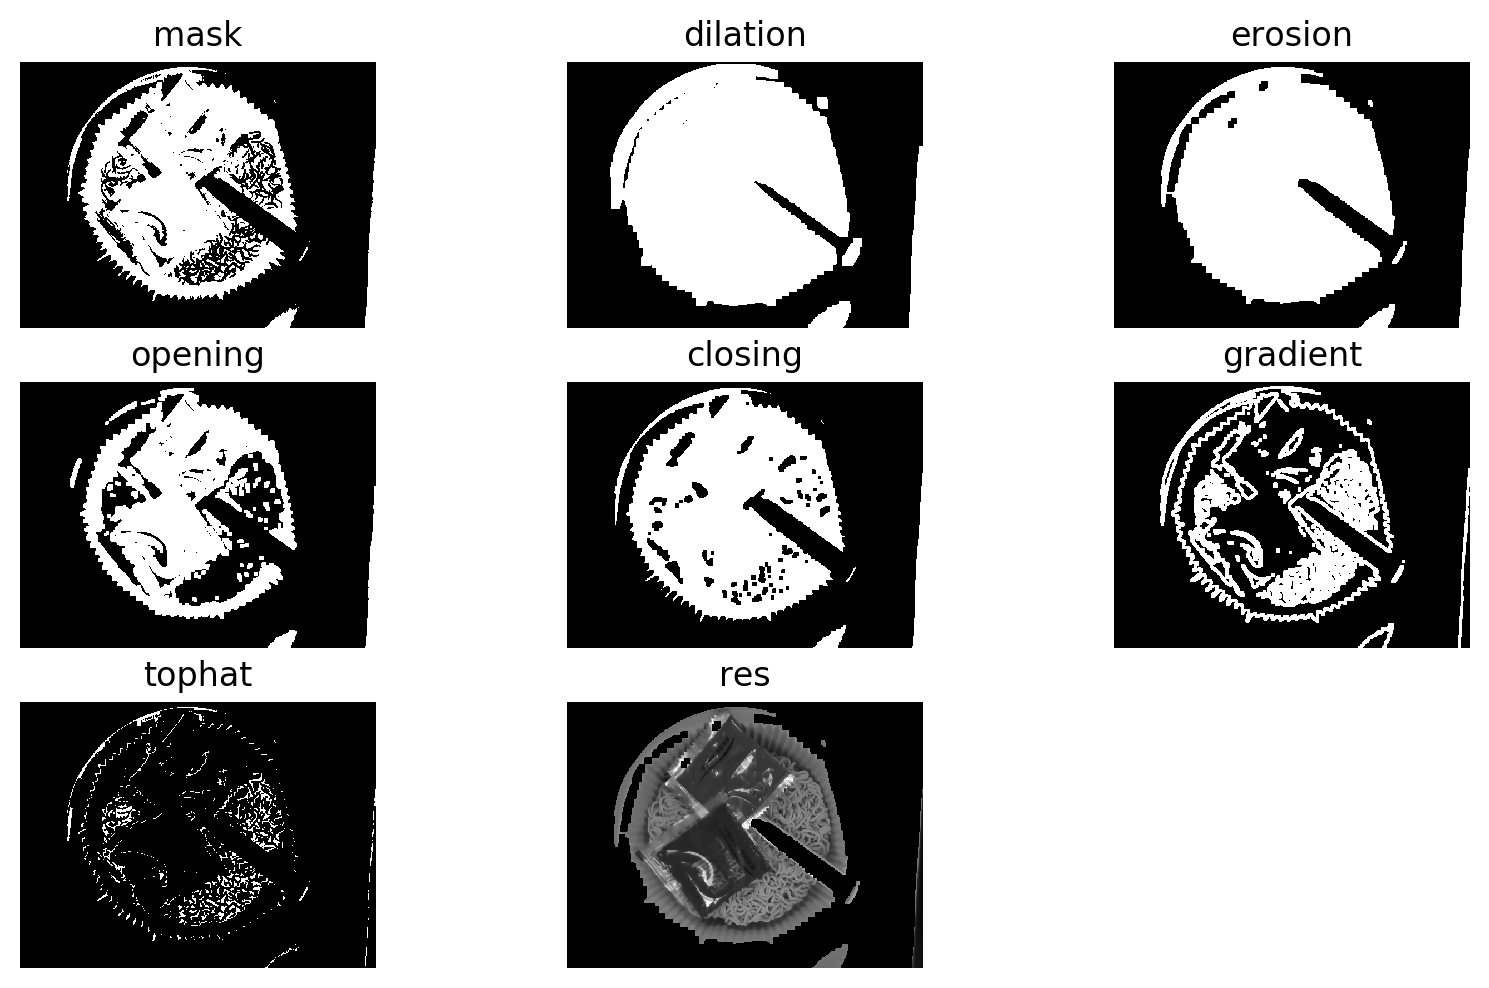

In [59]:
# —— 形态学处理 ——

import cv2
import numpy as np
import matplotlib.pyplot as plt
def nothing(x):
    pass
img = cv2.imread('noodle.png',0)

# —— 用bar找到想要的阈值 ——
# cv2.namedWindow("tracking")
# cv2.createTrackbar("l_T","tracking",113,255,nothing)
# cv2.createTrackbar("u_T","tracking",255,255,nothing)

# while True:
#     l_T=cv2.getTrackbarPos("l_T","tracking")
#     u_T=cv2.getTrackbarPos("u_T","tracking")
#     _,mask = cv2.threshold(img,l_T,u_T,cv2.THRESH_BINARY_INV)
#     cv2.imshow('img',img)
#     cv2.imshow('mask',mask)
#     key = cv2.waitKey(1)
#     if key == 27:
#         break
# cv2.destroyAllWindows()

_,mask=cv2.threshold(img,113,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((6,6),np.int8)
dilation = cv2.dilate(mask,kernel,iterations=3)
erosion = cv2.erode(dilation,kernel,iterations=2)
opening = cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernel,iterations=1)
closing = cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernel,iterations=1)
mg = cv2.morphologyEx(mask,cv2.MORPH_GRADIENT,kernel,iterations=1) # dilation - erosion
tophat = cv2.morphologyEx(mask,cv2.MORPH_TOPHAT,kernel,iterations=1)



res=cv2.bitwise_and(img,img,mask=erosion)
title = ['image','mask','dilation','erosion','opening','closing','mg','tophat','res']
image = [img,mask,dilation,erosion,opening,closing,mg,tophat,res]

plt.figure(figsize=(10,6),dpi=200)
for i in range(8):
    plt.subplot(3,3,i+1),
    plt.imshow(image[i+1],'gray')
    plt.title(title[i+1])
#     plt.xticks([]),plt.yticks([])
    plt.axis('off')
plt.show()
